<a href="https://colab.research.google.com/github/Hind-Saleh-Alatawi/Domain_Specific_embeddings_with_deep_Model_classifier/blob/main/Final_Embedding_and_Deep_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

                                                   text  ...                source
0              why have we thought about that over here  ...  combined balanced WS
1                                           on yer side  ...  combined balanced WS
2     how much you want to bet it is black male runn...  ...  combined balanced WS
3     frederick neichzche embraced the notion that f...  ...  combined balanced WS
4     there are so many race mixing ads on tv that i...  ...  combined balanced WS
...                                                 ...  ...                   ...
1995  living in boarder state texas the problems of ...  ...  combined balanced WS
1996  when hear the term american think of yahoos wh...  ...  combined balanced WS
1997  stop race mixing and discourage those who prac...  ...  combined balanced WS
1998  the negro is for white genocide and have nothi...  ...  combined balanced WS
1999  this is the false front which jews present to ...  ...  combined balanced WS

[20

array([0.78 , 0.825])

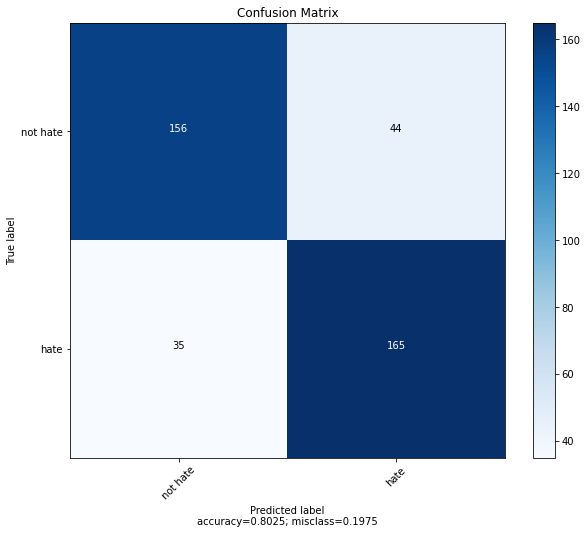

In [ ]:

#https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
%tensorflow_version 1.x
import datetime
import io
import re
from keras.utils.vis_utils import plot_model
from sklearn import metrics
import pandas as pd
from numpy import zeros
from numpy import asarray
from bs4 import BeautifulSoup
from sklearn.metrics import confusion_matrix
from keras import layers
from string import punctuation
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalMaxPool1D, LSTM, Activation, Bidirectional, CuDNNLSTM,GRU
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score


'''
                'SubsetCombinedBalancedWS': '/content/drive/My Drive/white _supremacist/BalancedSubsetStormfrontdataset.csv'
                 'Davidson': '/content/drive/My Drive/hate speech/Datasets Hatespeech/labeled_data_Davidson_27000_ready.csv',
                 'Waseem-EMNLP': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Waseem-EMNLP.csv',
                 'Waseem-NAACL': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Waseem-NAACL.csv',
                 'Combined_balanced':'/content/drive/My Drive/hate speech/Datasets Hatespeech/LabeledDavidsonWaseemCombinedBalanced32512.csv'
'''
'''
Preprocessed hate speech datasets without user names
'Davidson': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNLabeledDavidsonWaseemCombinedBalanced32512.csv',
                 'Waseem-EMNLP': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNWaseem-EMNLP.csv',
                 'Waseem-NAACL': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNWaseem-NAACL.csv',
                 'Combined_balanced':'/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNLabeledDavidsonWaseemCombinedBalanced32512.csv'
'''
'''
Preprocessed hate speech datasets with user names
'Davidson': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_With_users/Final_Preprocessed_datasets_WUNlabeled_data_Davidson_27000_ready.csv',
                 'Waseem-EMNLP': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_With_users/Final_Preprocessed_datasets_WUNWaseem-EMNLP.csv',
                 'Waseem-NAACL': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_With_users/Final_Preprocessed_datasets_WUNWaseem-NAACL.csv',
                 'Combined_balanced':'/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_With_users/Final_Preprocessed_datasets_WUNLabeledDavidsonWaseemCombinedBalanced32512.csv'
'Waseem-EMNLP': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNWaseem-EMNLP.csv',
                 'Waseem-NAACL': '/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNWaseem-NAACL.csv',
                 'Combined_balanced':'/content/drive/My Drive/hate speech/Datasets Hatespeech/Final_Preprocessed_Hate_RemoveUserName/Final_Preprocessed_datasets_WUNLabeledDavidsonWaseemCombinedBalanced32512.csv'

'''
from sklearn.model_selection import train_test_split
filepath_dict = {
                 'combined balanced WS':'/content/drive/MyDrive/white _supremacist/BalancedSubsetStormfrontdataset.csv'
                }
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath,names=['text','label'],sep=',',skiprows=[0])#skiprows=[0] to skip header file text,label from each file
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)
df = pd.concat(df_list)
df.to_csv("df.csv")
print(df)
def clean_doc(doc):
    #for row in doc:
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out tokens not in vocab
    #tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

def makedocument(texts):
    # load all docs in a directory
    documents=list()
    for text in texts:
     tokens = clean_doc(text)
     #print(tokens)
     # add to list
     documents.append(tokens)
    return documents
# ['ike citizen life long funny running time feels like years robert matthew stones',' basically referring everyone around lose count many times offensive words used takes write sit word movie like life probably stink honest audience surrounding theater people fat jokes well life crude years ago movies blacks people good part lot blacks racial groups improved new stereotype movies many recent films actors chris blacks presented artists youths sets fault rest actors they eat people write projects accept without protest virtue makeup ages year olds otherwise life associated see risk']
# load embedding as a dict
def load_embedding(embeddingfilename):
	# load embedding into memory, skip first line
	file = open(embeddingfilename,'r',encoding="utf-8")
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, word_index,embedding_dim):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(word_index) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = zeros((vocab_size, embedding_dim))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in word_index.items():
		vector=embedding.get(word)
		if vector is not None: # exclude empty vector
			weight_matrix[i] = vector
	return weight_matrix
all_outputs=[]
all_figures=[]
csv_file="ConfusionMatrix"
#csv_file="FinalPretrainedDeepModelResult"+datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")+".csv"
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['text'].values
    y = df_source['label'].values
    def max_length(lines):
        return max([len(s.split()) for s in lines])
    DatasetName=source
    print("Processing dataset...."+DatasetName)
    df_ChoosenDataset = df[df['source'] == DatasetName]
    sentences = df_ChoosenDataset['text'].values
    y = df_ChoosenDataset['label'].values
    number_of_labels = df_ChoosenDataset['label'].value_counts()
    print('number_of_labels is :\n',number_of_labels)
    sentences=makedocument(sentences)
    print(sentences)
    print(y)
    #sentences=preprocess_text(sentences)
    sentences_train, sentences_test, y_train, y_test = train_test_split(
       sentences, y, stratify=y, test_size=0.2,random_state=1000)
    sentences_test_dataframe=pd.DataFrame(sentences_test)
    sentences_test_dataframe.to_csv("testSentences")
    # load embedding from file
    length = max_length(sentences_train)
    print('length(sentences_train)',len(sentences_train))
    from keras.preprocessing.text import Tokenizer
    tokenizer = Tokenizer()
    allsentences=sentences_train+sentences_test
    tokenizer.fit_on_texts(allsentences)
    for word in ['kill', 'muslim', 'happy', 'black']:
        print('{}: {}'.format(word, tokenizer.word_index[word]))
    encoded_docs = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)
    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

    print(sentences_train[2])
    print(encoded_docs[2])
    embedding_dim = 300
    EmbeddingFile='/content/drive/My Drive/white _supremacist/All_Twitter_WS_withHateWords_1M_300_CBOW.txt'
    #EmbeddingFile='/content/drive/My Drive/hate speech/Models/glove.twitter.27B.200d.txt'
    #EmbeddingFile='/content/drive/My Drive/hate speech/Models/glove.6B.300d.txt'
    raw_embedding = load_embedding(EmbeddingFile)
    embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index,embedding_dim)
    # create the embedding layer
    print(embedding_vectors)
    # define model this is different frm original one
    class_names = ["HATE","NONHATE"]
    #First, let’s have a quick look how many of the embedding vectors are nonzero:
    nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_vectors, axis=1))
    similarity_percentage=nonzero_elements / vocab_size
    #This means 95.1% of the vocabulary is covered by the pretrained model, which is a good coverage of our vocabulary. Let’s have a look at the performance when using the GlobalMaxPool1D layer:
    print("{} of the vocabulary is covered by the pretrained model for {}".format(similarity_percentage,DatasetName))
    from keras.preprocessing.sequence import pad_sequences
    maxlen = max([len(s.split()) for s in sentences_train])
    X_train = pad_sequences(encoded_docs, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
    print(X_train[0, :])
    '''
    This means 95.1% of the vocabulary is covered by the pretrained model,
    which is a good coverage of our vocabulary.
    Let’s have a look at the performance when using the GlobalMaxPool1D layer:
    '''
    print('maxlen',maxlen)
    # Model Building
    embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen)# when  the vla loss become greater than 1.8# when ,trainable=True the vla loss become greater than 1.8
    #Embedding(vocab_size, embedding_dim, input_length=maxlen)
    model = Sequential()
    model.add(embedding_layer)
    model.add(Bidirectional(CuDNNLSTM(75)))
    #model.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    #model.add(GlobalMaxPool1D())
    #model.add(Flatten())
    #model.add(LSTM(75))
    model.add(Dense(32, activation='linear'))
    model.add(Dense(1, activation='sigmoid'))# compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    print(vocab_size)
    def Model_structure(model):
      plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)
    Model_structure(model)
    # Model Training and testing
    history=model.fit(X_train, y_train, epochs=10,batch_size=256,validation_split=0.2,verbose=2)
    loss, accuracy = model.evaluate(X_train, y_train,verbose=2)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, acc = model.evaluate(X_test, y_test,verbose=2)
    print("Testing Accuracy:  {:.4f}".format(acc))
    y_predict=model.predict(X_test)
    prediction_result = pd.DataFrame()
    prediction_result['sentences_test']=sentences_test
    prediction_result['y_test']= y_test
    prediction_result['y_predict']=y_predict.round()
    prediction_result.to_csv("prediction_result of Test set.csv")
    print(classification_report(y_predict.round(), y_test))
    accuracy=accuracy_score(y_test, y_predict.round())
    print('DEEP MODEL Accuracy:',accuracy)
    precision=precision_score(y_test, y_predict.round())
    print('DEEP MODEL precision_score:', precision)
    recall=recall_score(y_test, y_predict.round())
    print('DEEP MODEL recall_score:',recall )
    f1=f1_score(y_test, y_predict.round())
    print('DEEP MODEL f1_score:',f1 )
    f0=f1_score(y_test, y_predict.round(),pos_label=0)
    print('DEEP MODEL f1_score of Zero:',f0 )
    fweighted=f1_score(y_test, y_predict.round(),average='weighted')
    print('DEEP MODEL f1_score of fweighted:',fweighted )
    fMacro=f1_score(y_test, y_predict.round(),average='macro')
    print('DEEP MODEL f1_score of fMacro:',fMacro )
    fMicro=f1_score(y_test, y_predict.round(),average='micro')
    print('DEEP MODEL f1_score of fMicro:',fMicro )
    fMicro=f1_score(y_test, y_predict.round(),average='micro')
    print('DEEP MODEL f1_score of fMicro:',fMicro )
    #classification_report
    classificationReport=classification_report(y_test, y_predict.round())
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predict.round())
    AUC=metrics.auc(fpr, tpr)
    print('DEEP MODEL AUC: ' ,AUC)
    print('Dataset Name: ' ,DatasetName)
    import seaborn as sns
    labels=["neutral","hate"]
    cm =confusion_matrix(y_test, y_predict.round())
    print("confusion matrix",cm)
    import numpy as np
    def plot_confusion_matrix(cm, target_names,
                              title='Confusion matrix',
                              cmap=None,
                              normalize=True):
        import matplotlib.pyplot as plt
        import numpy as np
        import itertools

        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
              plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        #plt.show()
        csv_file=source+"ConfusionMatrix"
        plt.savefig(csv_file.split('.csv')[0] + '.png')


    mycmplt=plot_confusion_matrix(cm,
                        normalize=False,
                        target_names = ['not hate', 'hate'],
                        title        = "Confusion Matrix")

    '''
    index = ['neutral','hate']
    columns = ['neutral','hate']
    cm_df = pd.DataFrame(cm,columns,index)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    '''
    ####
    from datetime import datetime

    now = datetime.now()
    model_summary=model.summary()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    def get_model_summary(model):
        stream = io.StringIO()
        model.summary(print_fn=lambda x: stream.write(x + '\n'))
        summary_string = stream.getvalue()
        stream.close()
        return summary_string

    model_summary_string = get_model_summary(model)
    totals = [DatasetName,similarity_percentage, accuracy, precision, recall,f1,f0,fweighted,fMacro,fMicro,AUC,dt_string,model_summary_string,plt,classificationReport]
    all_outputs.append(totals)
    mytest = "Google hate die"
    encoded_mytest = tokenizer.texts_to_sequences([mytest])
    padded_mytest = pad_sequences(encoded_mytest, maxlen=maxlen, padding='post')
    yhat = model.predict(padded_mytest)
    print('prediction of sentence',yhat)
result = pd.DataFrame(data=all_outputs, columns=['Dataset Name',"similarity_percentage", 'accuracy', 'precision', 'recall','f1','f0','fweighted','fMacro','fMicro','AUC','today date Time','model summary','plt','classificationReport'])
result.to_csv("FinalPretrainedDeepModelResult"+datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")+".csv")
csv_file="FinalPretrainedDeepModelResult"



######################################### Multichannel CNN
cm = confusion_matrix(y_test, y_predict.round())
print(cm)
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)
#The diagonal entries are the accuracies of each class
cm.diagonal()
#array([1.        , 0.        , 0.66666667])

In [ ]:
pip install lime


In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
print(type(raw_embedding))
c = make_pipeline(embedding_vectors, model)#raw_embedding

<class 'dict'>


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t is None or t == 'passthrough':


TypeError: ignored

In [ ]:
print(c.predict_proba([X_test.data[0]]))

In [ ]:
class_names = ['0', '1']
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx = 83
exp = explainer.explain_instance(X_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([X_test.data[idx]])[0,1])
print('True class: %s' % class_names[X_test.target[idx]])

In [ ]:
exp.as_list()

In [ ]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=False)


In [ ]:
exp.save_to_file('/tmp/oi.html')

In [ ]:
exp.show_in_notebook(text=True)